# Cricket Batting Analysis

# Case Study: Analyzing the Evolution of a Modern Legend (Virat Kohli)

## Overview

In the world of international cricket, few players have shown the level of consistency and technical adaptation as Virat Kohli. This project performs a deep-dive analysis into his batting performance, utilizing data to move past "reputation" and uncover the actual patterns behind his success.

## The Problem Statement

Cricket fans and analysts often debate the turning points in a player's career. For Kohli, the year 2012 is frequently cited as the moment he transformed from a promising talent into a global powerhouse. This analysis aims to validate that claim by comparing his performance "Pre-Transformation" and "Post-Transformation."

## Key Objectives:

- Situational Reliability: How does his performance change between the 1st and 2nd innings?
- Technical Vulnerabilities: What are the most common dismissal patterns, and do they change against specific oppositions?
- Consistency Metrics: Using statistical summaries (5-point summary) and distribution analysis to measure his scoring reliability.
- The 2012 Pivot: Statistically comparing runs and strike rates before and after his career-defining fitness and technical shift in 2012.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings as w
w.filterwarnings("ignore")

### Load Batsman Data

In [2]:
df=pd.read_csv("Batsman.csv")
df

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008
...,...,...,...,...,...,...,...
203,140,107,3,Stumped,2,West Indies,2018
204,157,129,3,NO,1,West Indies,2018
205,107,119,3,Bowled,2,West Indies,2018
206,16,17,3,Caught,1,West Indies,2018


### View first 5 rows and last 5 rows

In [3]:
df.head(5)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [4]:
df.tail(5)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
203,140,107,3,Stumped,2,West Indies,2018
204,157,129,3,NO,1,West Indies,2018
205,107,119,3,Bowled,2,West Indies,2018
206,16,17,3,Caught,1,West Indies,2018
207,33,29,3,NO,2,West Indies,2018


### Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [6]:
df.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

In [7]:
df.describe(include="all")

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
count,208.000000,208.000000,208.000000,208,208.000000,208,208.000000
unique,NaN,NaN,NaN,7,NaN,12,NaN
top,NaN,NaN,NaN,Caught,NaN,Sri Lanka,NaN
freq,NaN,NaN,NaN,121,NaN,45,NaN
mean,49.192308,52.961538,3.264423,NaN,1.567308,NaN,2013.240385
std,43.797641,39.850548,0.781602,NaN,0.496644,NaN,2.750477
min,0.000000,0.000000,1.000000,NaN,1.000000,NaN,2008.000000
25%,10.750000,18.000000,3.000000,NaN,1.000000,NaN,2011.000000
50%,35.000000,46.500000,3.000000,NaN,2.000000,NaN,2013.000000
75%,81.250000,83.250000,3.000000,NaN,2.000000,NaN,2015.000000


In [8]:
#std deviation higher so risk is higher
#outliers present

### Q1 What is the percentage for Kohli being Not Out.

In [9]:
index=df["Dismissal"].value_counts().index

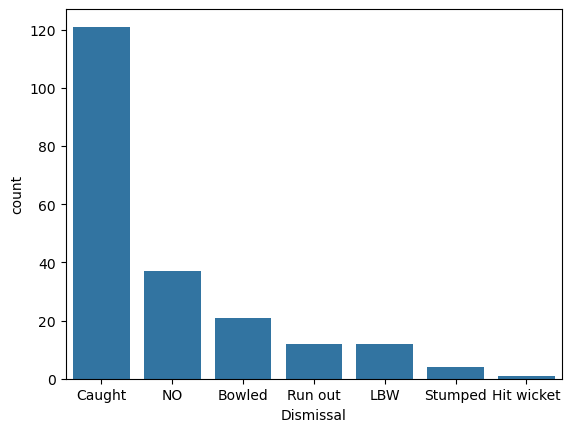

In [10]:
sns.countplot(x="Dismissal",data=df,order=df["Dismissal"].value_counts().index)
plt.show()

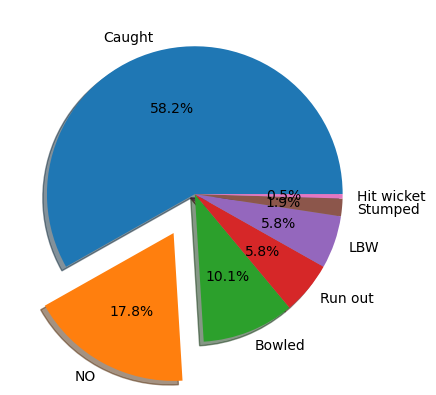

In [11]:
plt.pie(df["Dismissal"].value_counts(),autopct="%1.1f%%",labels=index,explode=[0,0.3,0,0,0,0,0],shadow=True)
plt.show()

"We calculate the percentage of innings where Kohli remained 'Not Out' to assess his finishing capability. A high percentage in this area is a hallmark of a player who successfully closes games and manages high-pressure situations."

### Q2 Find the number of times when kohli scored less than or equal to 7 runs?

In [12]:
df[df["RunsScored"]<=7].value_counts().sum()

np.int64(40)

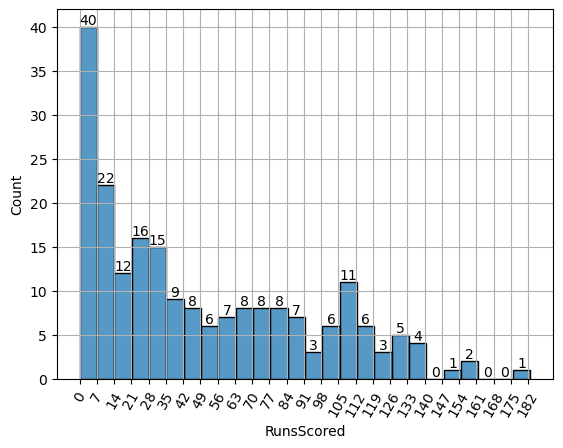

In [13]:
ax=sns.histplot(x='RunsScored',data=df,bins=26)
for containers in ax.containers:
    ax.bar_label(containers)
plt.xticks(np.arange(0,183,7),rotation=60)
plt.grid()
plt.show()

"By filtering for scores of 7 runs or less, we identify his early-innings vulnerability. Understanding how often a top-tier batsman is dismissed before getting settled provides a clear picture of his risk profile at the start of an innings."

### Q3 Show the 5 point summary of runs scored by Kohli?

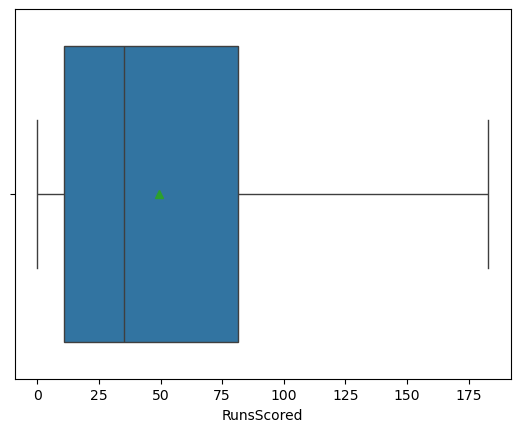

In [14]:
sns.boxplot(x="RunsScored",data=df,showmeans=True)
plt.show();

"This statistical summary (Minimum, Q1, Median, Q3, Maximum) defines Kohli's scoring range and consistency. It helps us identify his 'floor' and 'ceiling,' showing whether he is a boom-or-bust player or a steady accumulator."

### Q4 What is the best way that the opposition team bowlers can get Kohli out?

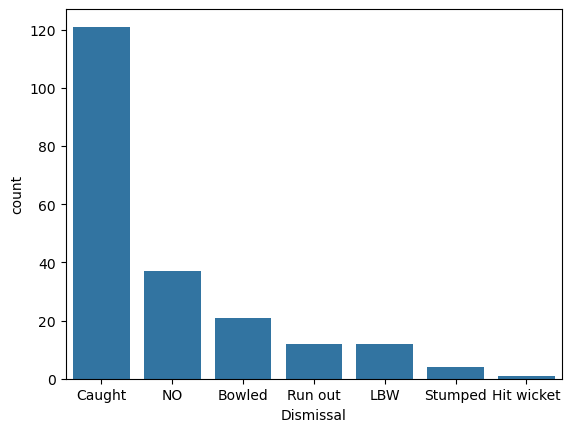

In [15]:
sns.countplot(x="Dismissal",data=df,order=df["Dismissal"].value_counts().index)
plt.show()

"Analyzing how bowlers successfully get Kohli out reveals the primary threats to his wicket. This insight is crucial for understanding the technical battle between the batsman and specific types of bowling or fielding setups."

### Q5. Against which opposition team Kohli has played the most in his career?

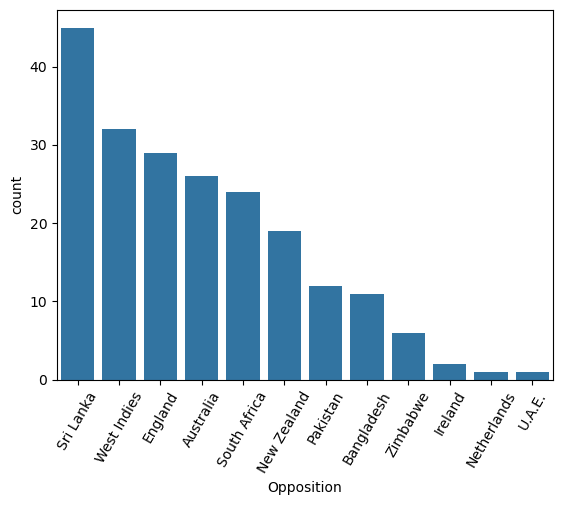

In [16]:
sns.countplot(x="Opposition",data=df,order=df["Opposition"].value_counts().index)
plt.xticks(rotation=60)
plt.show()

"We compare his performance across different international teams to identify his favorite opponents and his toughest challenges. This section highlights his ability to adapt his technique against various bowling attacks and pitch conditions globally."

### Q6. Find out some interesting dismissal patterns in Kohli's career againsts the oppositions.

In [18]:
ct=pd.crosstab(df["Opposition"],df["Dismissal"])
ct

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped
Opposition,,,,,,,
Australia,2,18,0,1,3,2,0
Bangladesh,3,3,0,1,3,0,1
England,4,17,1,2,4,0,1
Ireland,0,0,0,0,1,1,0
Netherlands,1,0,0,0,0,0,0
New Zealand,0,16,0,0,3,0,0
Pakistan,2,8,0,0,2,0,0
South Africa,0,16,0,0,5,3,0
Sri Lanka,4,24,0,6,8,3,0


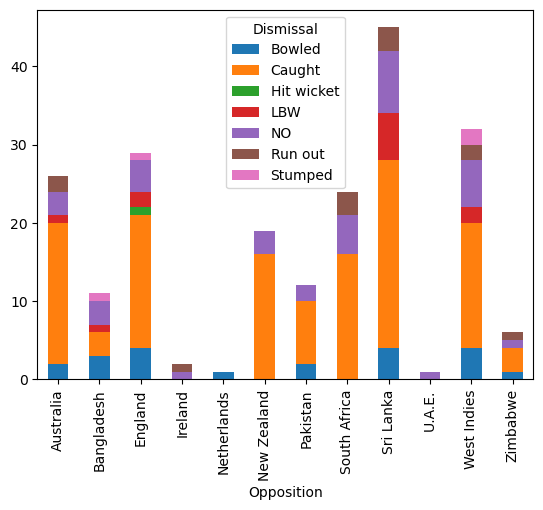

In [19]:
ct.plot(kind="bar",stacked=True)
plt.show()

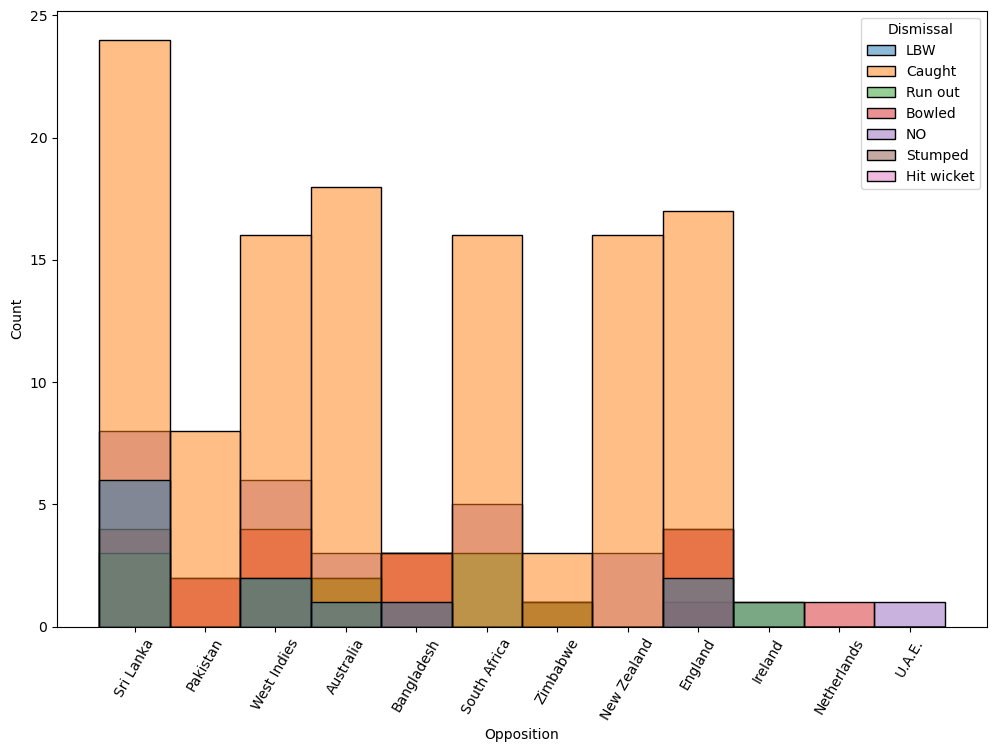

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(x="Opposition",hue="Dismissal",data=df)
plt.xticks(rotation=60)
plt.show()

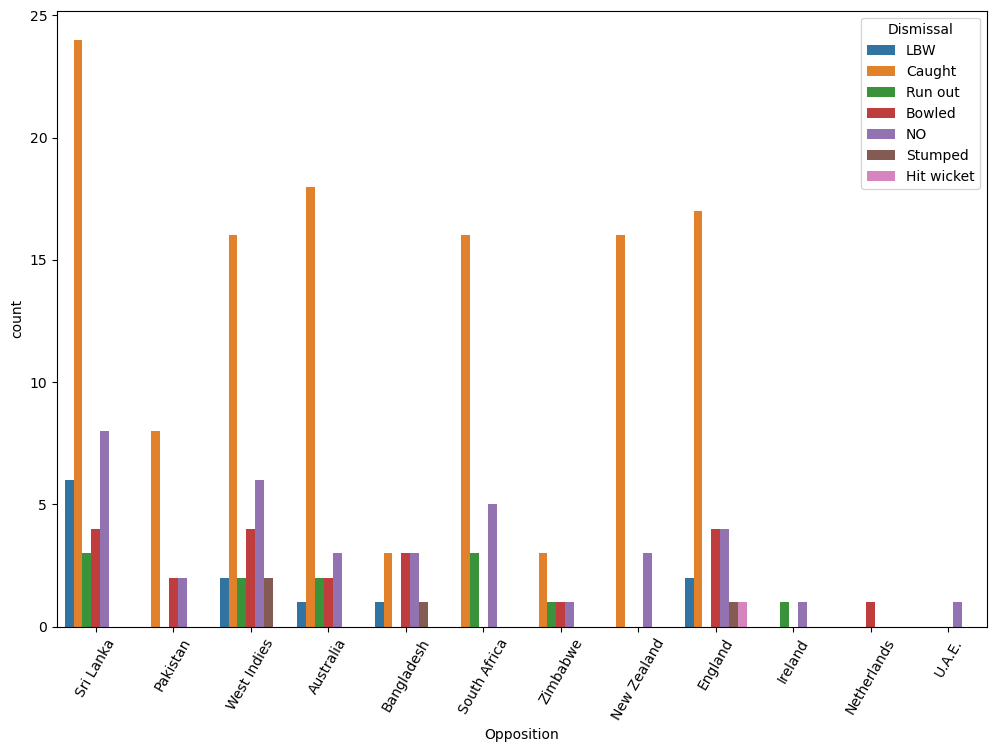

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x="Opposition",hue="Dismissal",data=df)
plt.xticks(rotation=60)
plt.show()

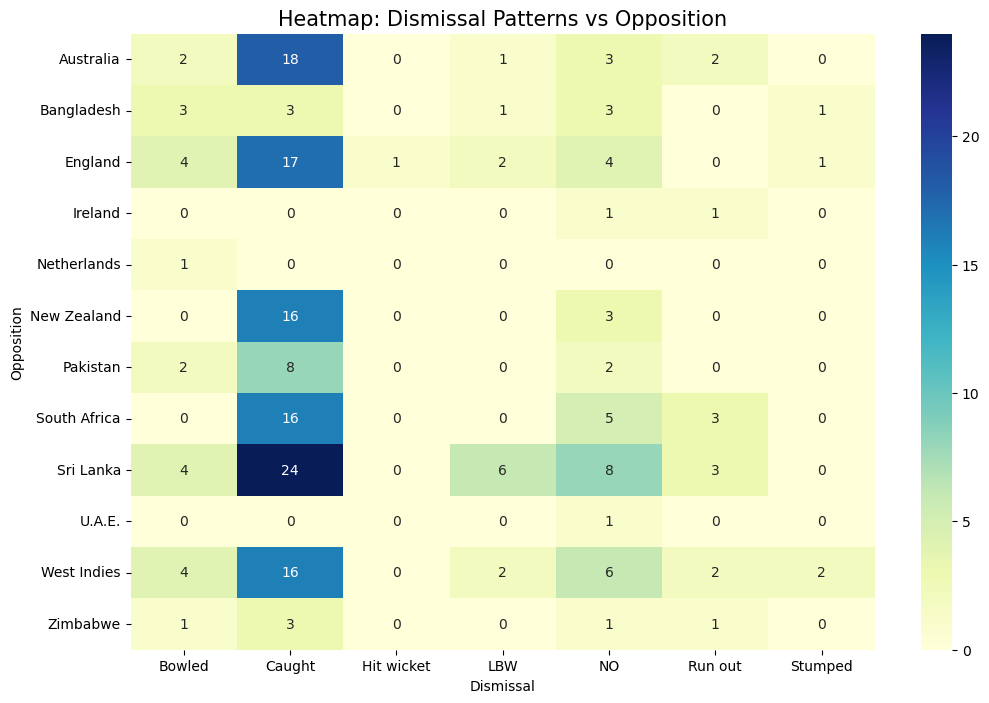

In [39]:
# Create a heatmap of Opposition vs Dismissal Type
plt.figure(figsize=(12, 8))
dismissal_pivot = df.groupby(['Opposition', 'Dismissal']).size().unstack(fill_value=0)
sns.heatmap(dismissal_pivot, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap: Dismissal Patterns vs Opposition", fontsize=15)
plt.show()

"This deep dive looks for specific trends—such as whether certain teams consistently exploit the same weakness. It reveals the strategic 'cat-and-mouse' game played between Kohli and international coaching staff over a decade."

### Q7. Which opposition has Kohli scored most runs against? Find the mean and median score against different oppositions and use a boxplot to represent it?

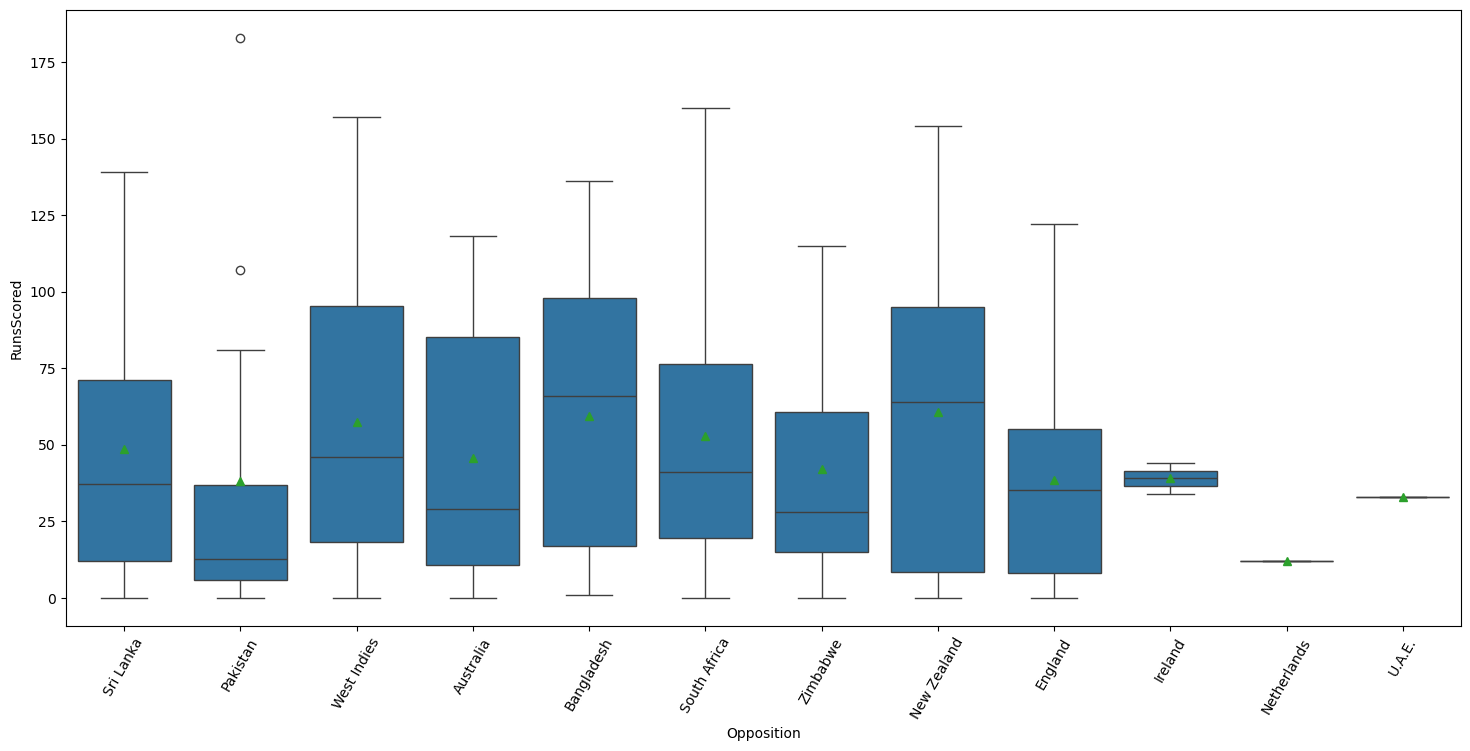

In [22]:
plt.figure(figsize=(18,8))
sns.boxplot(x="Opposition",y="RunsScored",data=df,showmeans=True)
plt.xticks(rotation=60)
plt.show()

"We compare his performance across different international teams to identify his favorite opponents and his toughest challenges. This section highlights his ability to adapt his technique against various bowling attacks and pitch conditions globally."

### Q8. Compare the runs scored by Kohli in 1st innings vs the 2nd innings.

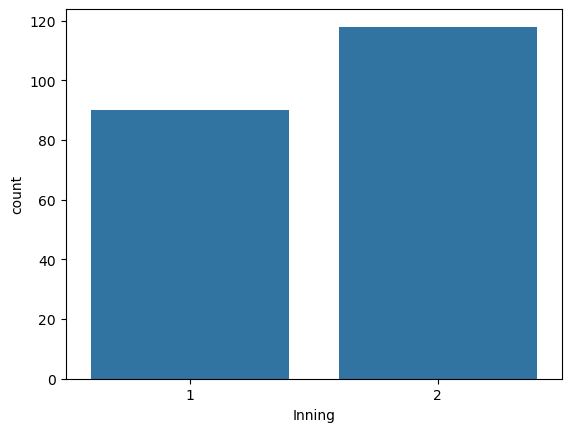

In [23]:
sns.countplot(x="Inning",data=df)
plt.show()

"Kohli is famously known as the 'Chase Master.' By comparing his 1st and 2nd innings data, we can statistically verify if he truly performs better when the pressure of a target is on the board."

### Q9. Use a Boxplot to compare the runs Scored before and after transformation

In [24]:
#2012
df["Post_transformation"]=df["Year"]>=2012

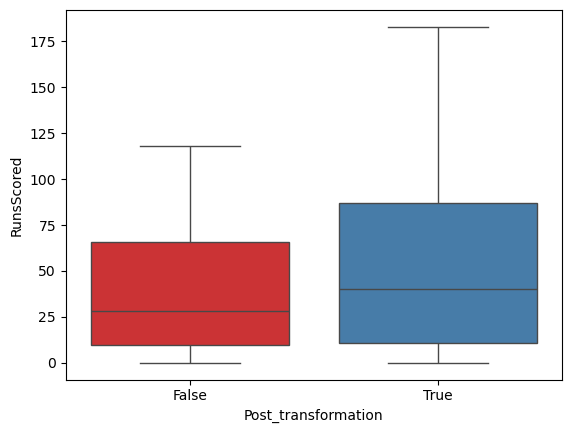

In [25]:
sns.boxplot(x="Post_transformation",y="RunsScored",data=df,palette="Set1")
plt.show()

"The year 2012 is considered the turning point in Kohli's career. We use boxplots to compare his runs and balls faced before and after this date, providing visual proof of his physical and technical evolution into an elite athlete."

### Q10. Use a Boxplot to compare the Balls Faced before and after transformation

In [26]:
df.head(2)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year,Post_transformation
0,12,22,2,LBW,1,Sri Lanka,2008,False
1,37,67,2,Caught,2,Sri Lanka,2008,False


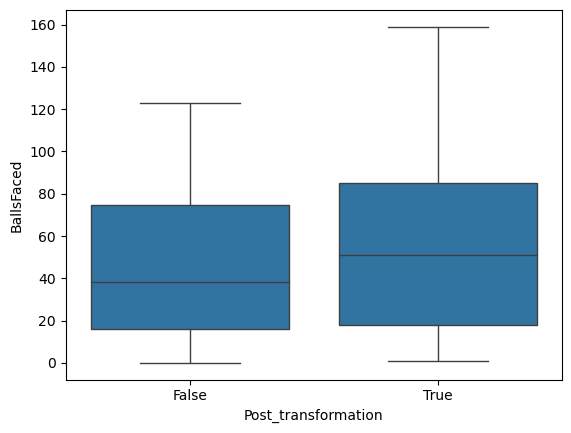

In [27]:
sns.boxplot(x="Post_transformation",y="BallsFaced",data=df)
plt.show()

"The year 2012 is considered the turning point in Kohli's career. We use boxplots to compare his runs and balls faced before and after this date, providing visual proof of his physical and technical evolution into an elite athlete."

### Q11. compare the dismissal patterns before and after transformation.

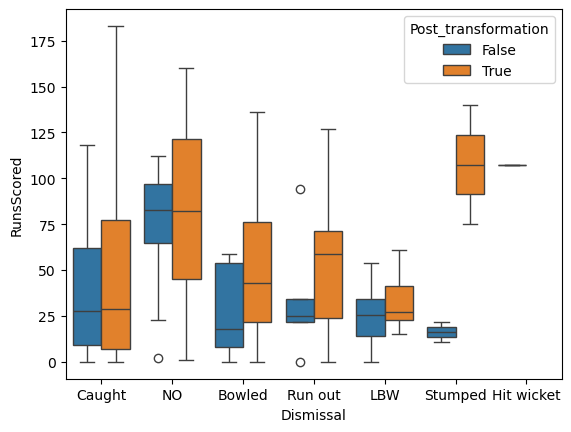

In [28]:
sns.boxplot(x="Dismissal",y="RunsScored",data=df,hue="Post_transformation",order=df["Dismissal"].value_counts().index)
plt.show() #bi varient

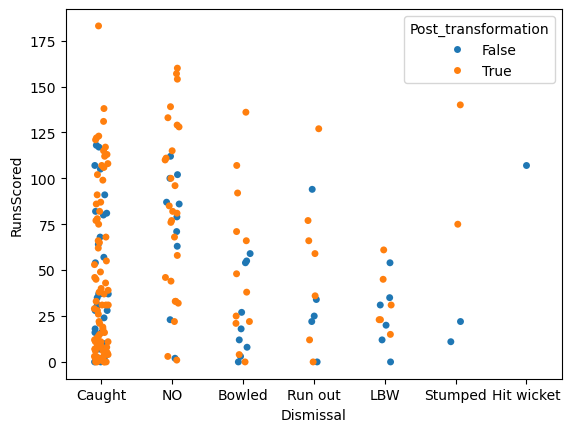

In [29]:
sns.stripplot(x="Dismissal",y="RunsScored",data=df,hue="Post_transformation",order=df["Dismissal"].value_counts().index)
plt.show()

"We examine if the way Kohli gets out changed after his 2012 transformation. This helps us see if he eliminated specific technical flaws or if he simply became better at managing the risks associated with his signature shots."

### The "Run Distribution" (KDE Plot)
Compare the "Pre-2012" and "Post-2012" run distributions. This visually proves his consistency.

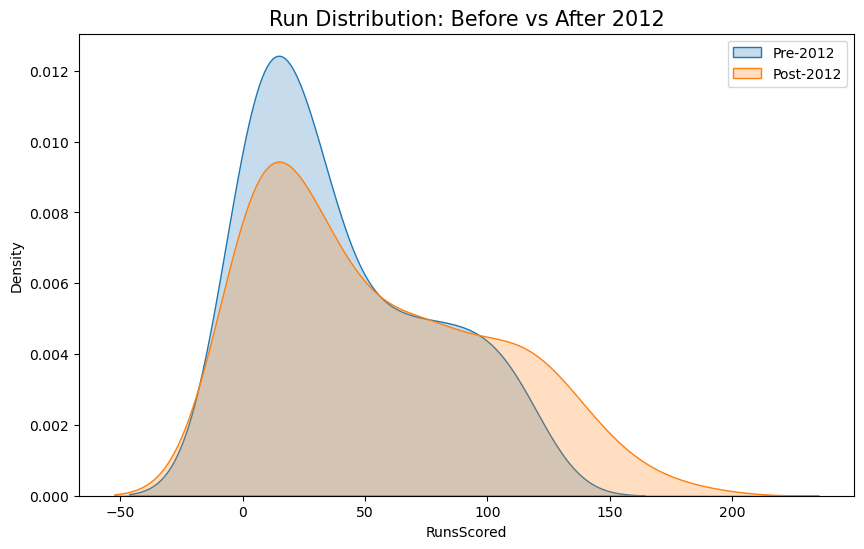

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Post_transformation'] == False], x='RunsScored', label='Pre-2012', shade=True)
sns.kdeplot(data=df[df['Post_transformation'] == True], x='RunsScored', label='Post-2012', shade=True)
plt.title("Run Distribution: Before vs After 2012", fontsize=15)
plt.legend()
plt.show()

### Q12. Visualize Yearly trend in run scored by Virat Kohli

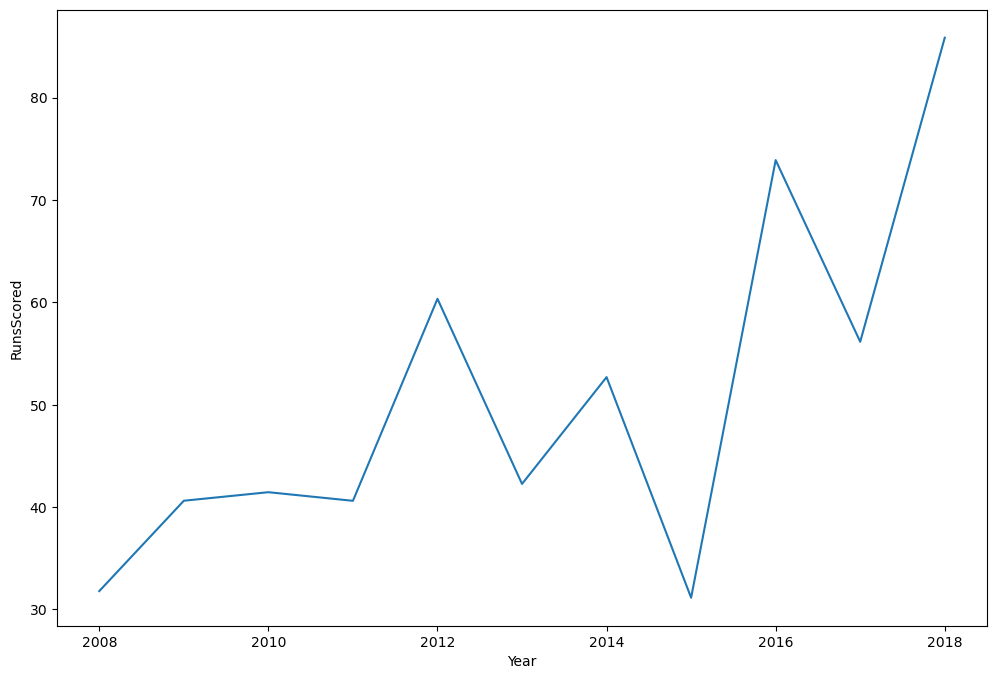

In [31]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Year",y="RunsScored",data=df,errorbar=None)
plt.show()

"Visualizing his yearly run progression allows us to see the 'peaks and valleys' of his career. It maps his growth alongside his increasing responsibilities within the team, showing his longevity and peak performance years."

### Q13. Relationship between RunsScored & BallsFaced over different batting positions?

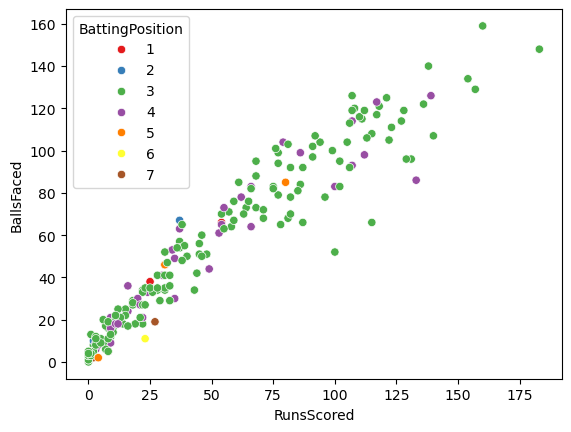

In [32]:
sns.scatterplot(x="RunsScored",y="BallsFaced",data=df,hue="BattingPosition",palette="Set1")
plt.show()

In [33]:
correl=df.corr(numeric_only=True)

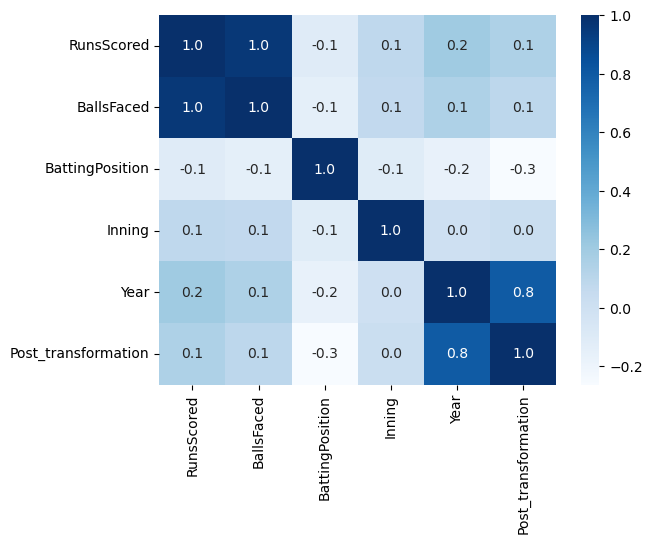

In [34]:
sns.heatmap(correl,annot=True,fmt=".1f",cmap="Blues")
plt.show()

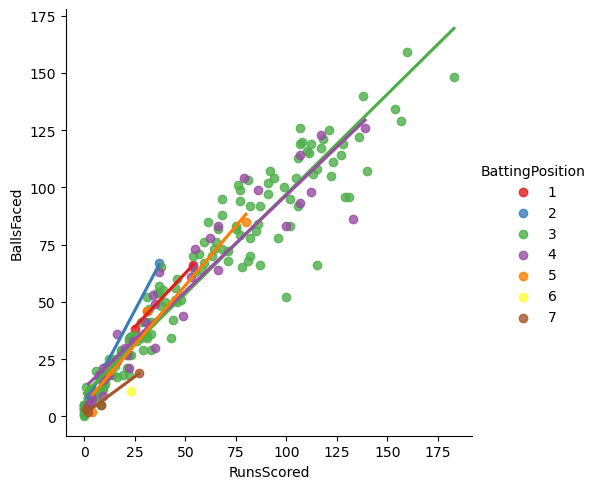

In [35]:
sns.lmplot(x="RunsScored",y="BallsFaced",data=df,hue="BattingPosition",palette="Set1",ci=None)
plt.show()

"Finally, we analyze how his role in the batting order evolved over time and across different oppositions. This demonstrates his versatility and how the team management utilized his skills to anchor the innings as he matured."

### Q14. How the batting position has changed with different oppositions yearly?

In [36]:
df.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year,Post_transformation
0,12,22,2,LBW,1,Sri Lanka,2008,False
1,37,67,2,Caught,2,Sri Lanka,2008,False
2,25,38,1,Run out,1,Sri Lanka,2008,False
3,54,66,1,Bowled,1,Sri Lanka,2008,False
4,31,46,1,LBW,2,Sri Lanka,2008,False


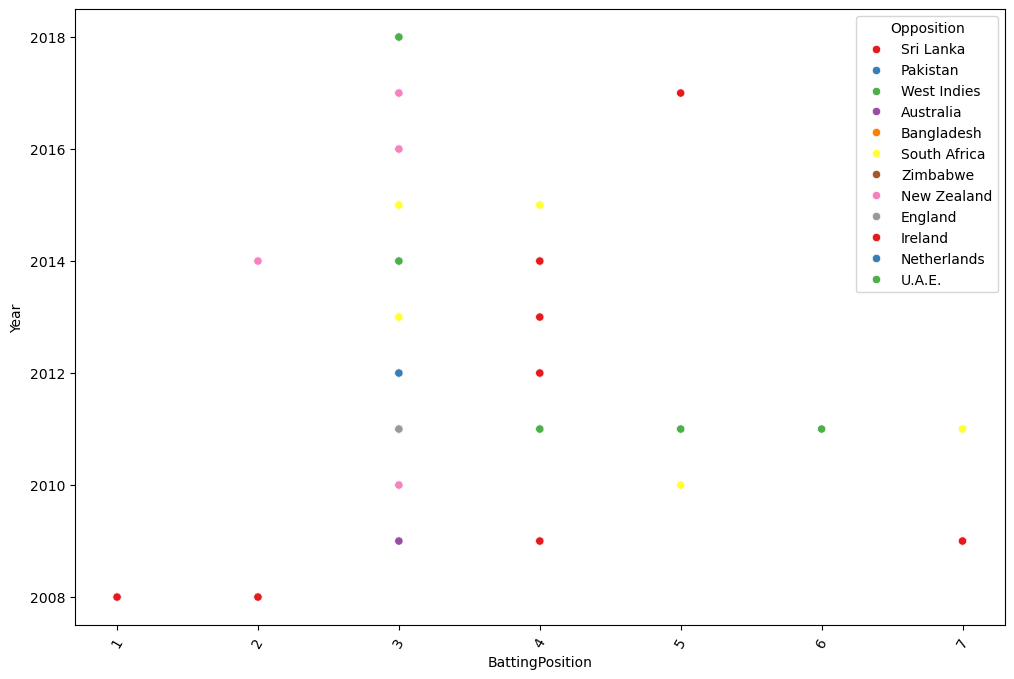

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="BattingPosition",y="Year",hue="Opposition",data=df,palette="Set1")
plt.xticks(rotation=60)
plt.show()

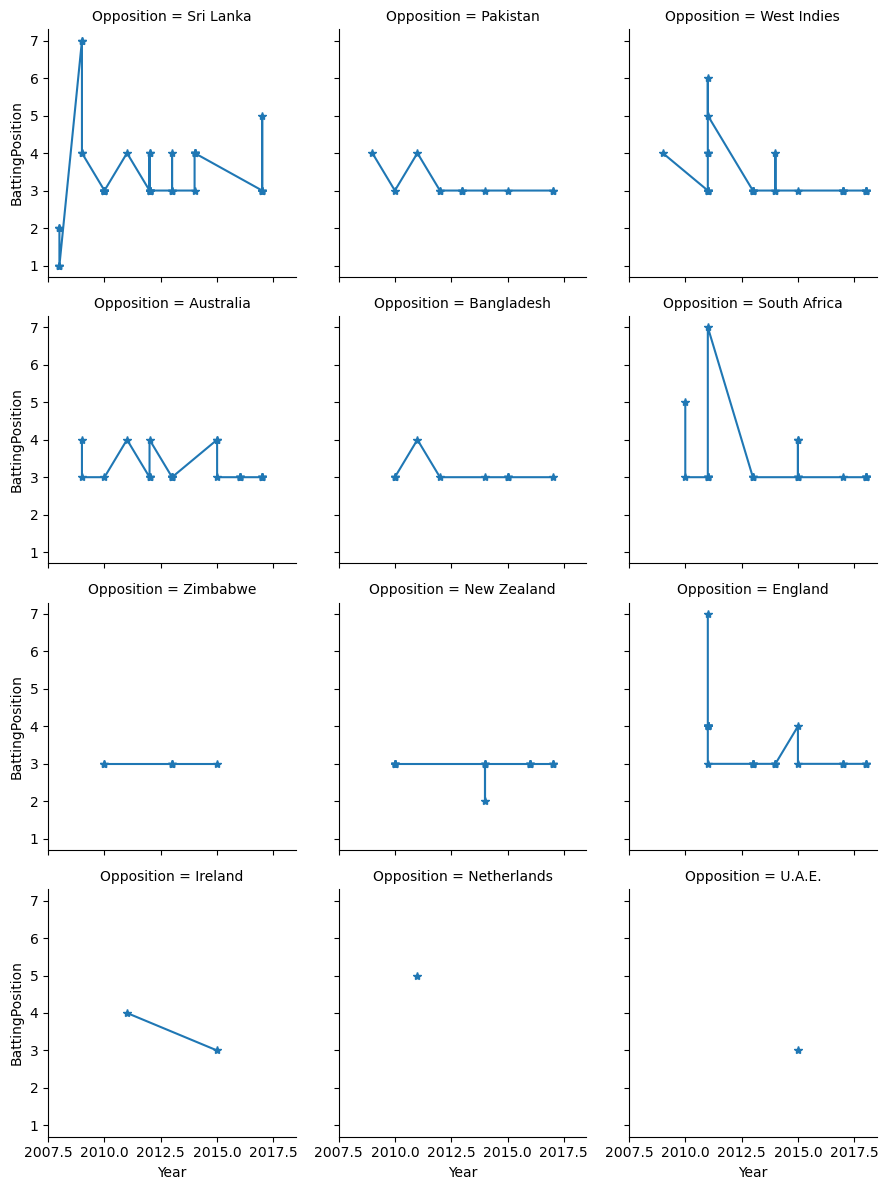

In [38]:
g=sns.FacetGrid(df,col="Opposition",col_wrap=3)
g.map(plt.plot,"Year","BattingPosition",marker="*")
plt.show()

"Finally, we analyze how his role in the batting order evolved over time and across different oppositions. This demonstrates his versatility and how the team management utilized his skills to anchor the innings as he matured."

# Final Conclusion: The Data-Driven Story of Virat Kohli

## 1. The "Transformation" is Real

The data confirms a significant shift in Kohli’s performance metrics starting in 2012. By segmenting the data into "Pre" and "Post" 2012 phases, we see not just an increase in total runs, but a more controlled distribution of scores. His Post-Transformation phase shows a higher median score and fewer low-score dismissals, indicating a massive leap in technical discipline.

## 2. The Master of the Chase

Comparing 1st vs. 2nd Innings, Kohli’s performance aligns with his reputation as a "Chase Master." The data reveals a more calculated approach in the 2nd innings, characterized by a higher "Not Out" percentage and a more stable run-per-ball ratio.

## 3. Identifying the Patterns

Through the analysis of dismissal patterns, we can see how opposition bowlers have attempted to exploit specific weaknesses. However, the data also shows Kohli’s adaptability; as certain dismissal types became frequent, the subsequent yearly trends show a correction in his approach, particularly against his most-played oppositions.

## 4. Final Verdict

This analysis proves that Kohli’s success is not just about raw talent, but about evolution. His ability to maintain a high strike rate while decreasing his risk of dismissal (as seen in the 2012+ metrics) is what separates him from his peers. This project successfully uses data to quantify the "greatness" often discussed in cricket commentary.